In [2]:
from sklearn.datasets import load_boston
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
# 加载波士顿房价数据集
boston = load_boston()
X, y = boston.data, boston.target

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


c:\Users\25046\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
def train_svr_model(kernel, C):
    # 创建SVR模型
    model = SVR(kernel=kernel, C=C)

    # 模型训练
    model.fit(X_train, y_train)

    # 在测试集上进行预测
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # 计算均方误差（MSE）
    mse_test = mean_squared_error(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train,y_pred_train)
    return mse_train,mse_test


In [4]:
# 超参数范围
C_values = np.linspace(1, 1000, 100)  # 生成100个均匀间隔的C值

# 记录结果的列表
train_mse_values = []
test_mse_values = []

# 遍历超参数
for C in C_values:
    train_mse,test_mse = train_svr_model('rbf', C)  # 训练集上的MSE
    train_mse_values.append(train_mse)
    test_mse_values.append(test_mse)




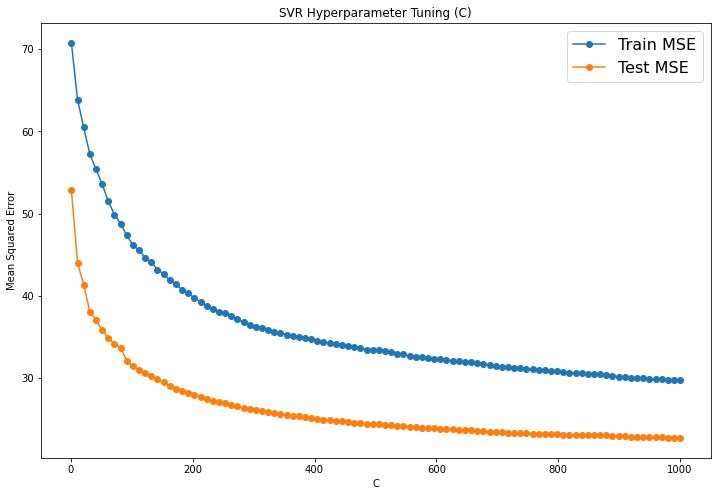

In [5]:
# 绘制图表
plt.figure(figsize=(12, 8))
plt.plot(C_values, train_mse_values, marker='o', label='Train MSE')
plt.plot(C_values, test_mse_values, marker='o', label='Test MSE')
plt.xlabel('C')
plt.ylabel('Mean Squared Error')
plt.title('SVR Hyperparameter Tuning (C)')
plt.legend(prop={'size': 16})
plt.show()

In [6]:
# 绘制图表
plt.plot(C_values, mse_values, marker='o')
plt.xlabel('C')
plt.ylabel('Mean Squared Error')
plt.title('SVR Hyperparameter Tuning (C)')
plt.show()


NameError: name 'mse_values' is not defined